## Importing the necessary packages

In [118]:
# import sys
# import tkinter as tk
# from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt


## Loading the raw data.
### The data is from the National grid and can be found here: https://data.nationalgrideso.com/demand/historic-demand-data/r/historic_demand_data_2022
#### This link also defines the column headers

In [119]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A61A-B099

 Directory of C:\Users\aniqb\Files\electricity_data

11/12/2022  19:38    <DIR>          .
11/12/2022  19:38    <DIR>          ..
11/12/2022  18:27    <DIR>          .ipynb_checkpoints
11/12/2022  18:22         1,441,863 demanddata.csv
11/12/2022  19:38           116,836 electricity_EDA.ipynb
               2 File(s)      1,558,699 bytes
               3 Dir(s)  138,683,478,016 bytes free


## Load the file and print the first few rows using pandas

In [120]:
df = pd.read_csv('demanddata.csv')

In [121]:
df.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
0,2022-01-01,1,21940,23275,20513,2412,6527,0,13080,0,450,-181,-4,586,320,384,-100,210,0
1,2022-01-01,2,22427,23489,21021,2554,6527,0,13080,0,173,-181,-4,583,320,403,-104,176,0
2,2022-01-01,3,21896,23672,20619,2696,6527,0,13080,0,799,-164,-4,567,320,440,-4,-205,0
3,2022-01-01,4,20693,23272,19615,2838,6527,0,13080,0,1516,-170,-4,444,320,387,-6,-283,0
4,2022-01-01,5,19481,23958,18545,2977,6527,0,13080,0,1490,-753,-4,-383,320,476,-561,-686,0


In [122]:
## Print out the different data features
column_names = df.columns
print(column_names)

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW'],
      dtype='object')


##Lets see how granular the data is in the time domain.

In [123]:
df.shape

(15504, 19)

In [124]:

df.loc[df["SETTLEMENT_DATE"] == "2022-01-01"].shape

##Seems there are 48 rows for each day with the 
##settlement perdiod ranging from 0 to 47

(48, 19)

In [125]:
##Lets see how many unique days there are in the data
df["SETTLEMENT_DATE"].nunique()

323

In [126]:
##Lets print the range of dates that are present in the dataset.
print(df["SETTLEMENT_DATE"].min())
print(df["SETTLEMENT_DATE"].max())

##Seems like as of 11st Dec 2022, the data has been updated to include data
##up to 19th Nov 2022

2022-01-01
2022-11-19


In [127]:
## Creating a new column where date and time is combined

In [128]:
##Lets see how many unique days there are in the data
df["SETTLEMENT_DATE"].dtypes

dtype('O')

In [129]:
# combine the date and time columns into a single datetime column
# using a default time of 00:00:00
df['DATETIME'] = pd.to_datetime(df['SETTLEMENT_DATE'] + ' 00:00:00', format='%Y-%m-%d %H:%M:%S')

# add the appropriate time interval to the datetime values
df['DATETIME'] = df['DATETIME'] + pd.to_timedelta(df['SETTLEMENT_PERIOD'], unit='h') / 2

df.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,DATETIME
0,2022-01-01,1,21940,23275,20513,2412,6527,0,13080,0,450,-181,-4,586,320,384,-100,210,0,2022-01-01 00:30:00
1,2022-01-01,2,22427,23489,21021,2554,6527,0,13080,0,173,-181,-4,583,320,403,-104,176,0,2022-01-01 01:00:00
2,2022-01-01,3,21896,23672,20619,2696,6527,0,13080,0,799,-164,-4,567,320,440,-4,-205,0,2022-01-01 01:30:00
3,2022-01-01,4,20693,23272,19615,2838,6527,0,13080,0,1516,-170,-4,444,320,387,-6,-283,0,2022-01-01 02:00:00
4,2022-01-01,5,19481,23958,18545,2977,6527,0,13080,0,1490,-753,-4,-383,320,476,-561,-686,0,2022-01-01 02:30:00


In [135]:
##Set the new datetime as the data frame index
df.set_index("DATETIME", inplace= True)

KeyError: "None of ['DATETIME'] are in the columns"

In [130]:
##Exploring ND, TSD and ENGLAND_WALES_DEMAND
###ND = National Demand 
### TSD = Transmission system demand and is  = ND + 3 additional demands
#### i) station load, ii) puump storage pumping, iii) interconnects exports
##### TSD includes estimate of station load of 500MW in BST and 600MW in GMT

##Plotting National Demand as a function of time with varying resolutions

<AxesSubplot: xlabel='DATETIME'>

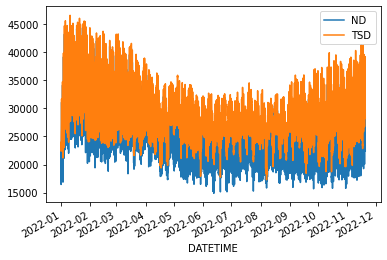

In [149]:
##Plotting all datapoints (i.e. half-hourly data)
df.plot( y = ['ND', 'TSD'])

<AxesSubplot: xlabel='DATETIME'>

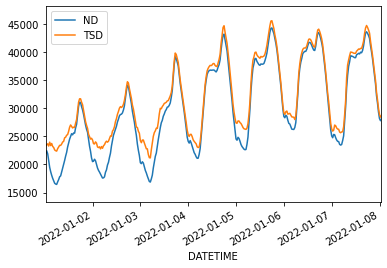

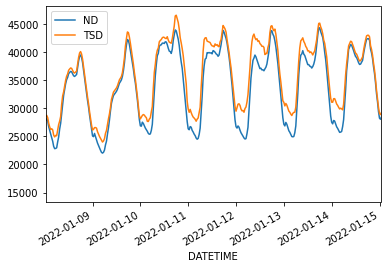

In [164]:
##Plotting first week only (i.e. half-hourly data)
df.plot( y = ['ND', 'TSD'], xlim = ("2022-01-01 00:30:00", "2022-01-08 00:30:00"))
df.plot( y = ['ND', 'TSD'], xlim = ("2022-01-08 00:30:00", "2022-01-15 00:30:00"))

<AxesSubplot: xlabel='DATETIME'>

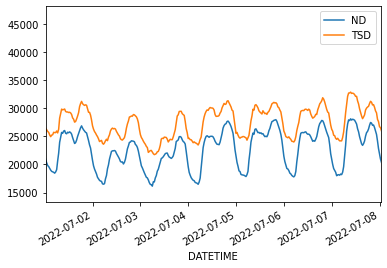

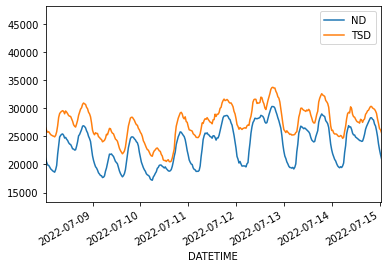

In [155]:
##Plotting one week in summer only (i.e. half-hourly data)
df.plot( y = ['ND', 'TSD'], xlim = ("2022-07-01 00:30:00", "2022-07-08 00:30:00"))
df.plot( y = ['ND', 'TSD'], xlim = ("2022-07-08 00:30:00", "2022-07-15 00:30:00"))

<AxesSubplot: xlabel='DATETIME'>

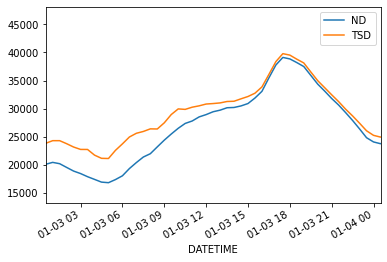

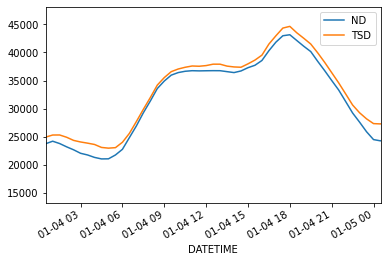

In [156]:
##Plotting one day only in winter (i.e. half-hourly data)
df.plot( y = ['ND', 'TSD'], xlim = ("2022-01-03 00:30:00", "2022-01-04 00:30:00"))
df.plot( y = ['ND', 'TSD'], xlim = ("2022-01-04 00:30:00", "2022-01-05 00:30:00"))

<AxesSubplot: xlabel='DATETIME'>

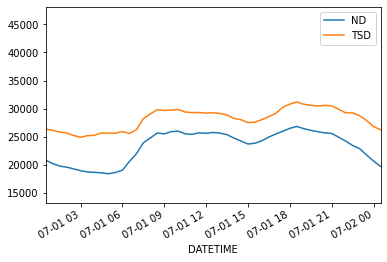

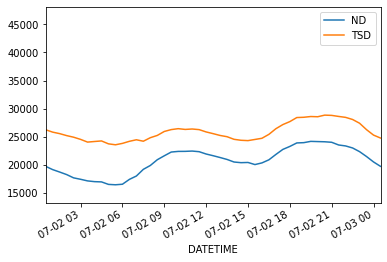

In [157]:
##Plotting one day only in summer (i.e. half-hourly data)
df.plot( y = ['ND', 'TSD'], xlim = ("2022-07-01 00:30:00", "2022-07-02 00:30:00"))
df.plot( y = ['ND', 'TSD'], xlim = ("2022-07-02 00:30:00", "2022-07-03 00:30:00"))